<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
CS6501 - MACHINE LEARNING AND APPLICATIONS
#**Business Analytics - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 
##***Annual Repeat***
###Instructor: Enrique Naredo

###RepMLA_Lab-1.13

Student ID: 16099958

Student name: Paerhati Remutula

# E-tivity: K-Nearest Neighbors

## Overview

The goal is to implement the K-nearest neighbors algorithm (a supervised machine learning algorithm) and apply it to a real dataset. Along the way you should familiarize yourself with some of the terminology you have read in the note. You will also get a chance to practice with Python and working with large datasets.


## Dataset introduction

The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

The dataset for this E-tivity is a set of handwritten digits from zip codes written on hand-addressed letters (MNIST-Modified National Institute of Standards and Technology database). 

Read about this dataset by going to the Elements of Statistical Learning website, <a href="https://web.stanford.edu/~hastie/ElemStatLearn/">ESL</a>, then clicking on the `Data` tab, then clicking on the `Info` for the zip code dataset (the last dataset). 

Use the command less in the terminal to view the beginning of each file. Both datasets have the same format: the first column is the "label" (or class) (here an integer between 0 and 9, inclusive, that corresponds to the identity of a hand-written zip code digit), and the rest of each row is made up of gray-scale values corresponding to the image of this hand-written digit.

One useful technique is to load a dataset from a file into a numpy array. Here is an example:

In [2]:
import numpy as np
train_data = np.loadtxt("datasets/mnist.train") #"path/to/train/file"
test_data  = np.loadtxt("datasets/mnist.test")

print(train_data.shape)
print(test_data.shape)

(7291, 257)
(2007, 257)


In [3]:
train_data #each row is a different image

array([[ 6.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 5.   , -1.   , -1.   , ..., -0.671, -0.828, -1.   ],
       [ 4.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       ...,
       [ 3.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 0.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])

The first column is the class, it tells us which digit we will find in the image, as you can see hereafter for the first row (it is a 6):

[[-1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.631  0.862 -0.167
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.    -0.992  0.297  1.     0.307
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.    -0.41   1.     0.986 -0.565
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -0.683  0.825  1.     0.562 -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -0.938  0.54   1.     0.778 -0.715 -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.     0.1    1.     0.922 -0.439 -1.    -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -0.257  0.95   1.    -0.162 -1.    -1.    -1.
  -0.987 -0.714 -0.832 -1.    -1.    -1.   ]
 [-1.    -1.    -0.797  0.909  1.     0.3   -0.961 -1.    -1.    -0.55
   0.485  0.996  0.867  0.092 -1.    -1.   ]
 [-1.    -1.     0.278  1.     0.877 -0.824 -1.    -0.905  0.145  0.977
   1.

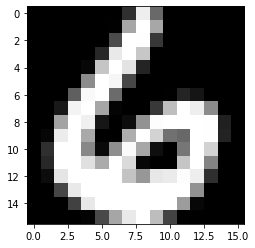

In [4]:
import matplotlib.pyplot as plt
row = 0
flatten_image = train_data[row, 1:]  # each 16x16 image has been flatten into a vector
im = flatten_image.reshape(16, 16)
print(im)  # as a matrix
plt.gray()
plt.imshow(im)  # as an image

The test set is similar:

In [5]:
test_data

array([[ 9., -1., -1., ..., -1., -1., -1.],
       [ 6., -1., -1., ..., -1., -1., -1.],
       [ 3., -1., -1., ..., -1., -1., -1.],
       ...,
       [ 4., -1., -1., ..., -1., -1., -1.],
       [ 0., -1., -1., ..., -1., -1., -1.],
       [ 1., -1., -1., ..., -1., -1., -1.]])

## Step 2: Filter the Data
To start, we will just consider two classes, but here we have 10. We will get to such problems later, but for now, devise a way to retain only the rows which have label 2 or 3. Do this for both the train and test data.

One important note: it may be convenient to relabel the 2 to -1 and the 3 to +1, since this will work better with our methods later on (but you do not have to do this).


In [6]:
train_23 = []
for row in train_data:
    if row[0] in [2, 3]:
        train_23.append(row)

In [8]:
train_23 = np.asarray(train_23)
train_23.shape

(1389, 257)

In [9]:
test_23 = []
for row in test_data:
    if row[0] in [2, 3]:
        test_23.append(row)

test_23 = np.asarray(test_23)

(364, 257)

In [10]:
test_23[0]  # take a peak

array([ 3.   , -1.   , -1.   , -1.   , -0.593,  0.7  ,  1.   ,  1.   ,
        1.   ,  1.   ,  0.853,  0.075, -0.925, -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -0.553,  0.998,  1.   ,  1.   ,  1.   ,
        1.   ,  1.   ,  1.   ,  1.   ,  0.961, -0.076, -0.999, -1.   ,
       -1.   , -1.   , -1.   ,  0.228,  1.   ,  0.849, -0.15 , -0.705,
       -1.   , -0.85 , -0.333, -0.072,  0.929,  1.   , -0.451, -1.   ,
       -1.   , -1.   , -1.   , -0.586,  0.777, -0.524, -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   ,  0.344,  1.   ,  0.544, -0.999,
       -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -0.803,  0.93 ,  1.   ,  0.65 , -0.999,
       -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -0.579,  0.821,  1.   ,  1.   , -0.131, -1.   ,
       -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -0.621,  0.156,  0.934,  1.   ,  1.   ,  0.575, -0.933, -1.   ,
      

## Implement K-nearest neighbors

The main goal of the E-tivity is to implement the K-nearest neighbors classifier to predict the class of each example from the test dataset. Exactly how you implement this part is up to you, but your code should be decomposed into functions, well commented, and easy to understand. Here are some suggestions:

**Classification**
Create a function that takes as input the train set, (at least) a test example and an integer K, and outputs a prediction based on a nearest-neighbor classifier. This function will loop through all the training examples, find the distance between each one and the input test example, and then find the K nearest neighbors (you are welcome to use numpy sorting methods, but look up how they work first). For this subroutine, we will need a distance function. In practice, you have to implement the algorithm 3 in <a href="http://ciml.info/dl/v0_99/ciml-v0_99-ch03.pdf">Duame</a> (pag. 33).


You should implement a Python function like:

## Student note: The implementation below is too slow, there is an optimised version of functions get_euc_distance() and KNN() at the later part of this notebook. 

In [38]:
def get_euc_distance(A, B):
    """
    For given array A and B, return the euclidean distance. 
    """

    # The line below should be read from right to left: 
    #  for each pair (a, b) in the combination of A, B, 
    #  calculate (a - b) and then raise to the power of 2, 
    #  Because this 'for' loop is wrapped in a square bracket, 
    #  the outcome of each iteration in the loop will become 
    #  a list. 
    #  Then we use np.sum to get the sum of this list. 
    #  Finally return the square root of this sum. 
    return np.sqrt(np.sum([(a - b) ** 2 for a, b in zip(A, B)]))


def KNN(train: list, test: list, K: int) -> list:  
    """
    Given a training set, one or more test cases, and an integer K, 
    predict the class of each test case using K-nearest-neighbours 
    algorithm. 

    @param train: a list of training samples, can contain multiple classes, 
                    each element in this list is a sub-list with its first 
                    item being the class, and following 256 elements combined 
                    is the training sample. 
    @param test: a list of (one or more) test cases. 
    @param K: integer number indicating how many neighbours to look at. 

    @return: a list of prediction result, this list has the same size as the 
                input parameter 'test' 
    """
    if len(test) == 0:  # if the test parameter is empty, return an empty list. 
        print('No test case given. ')
        return []
    
    prediction_results = []  # place-holder list for the classification result
    
    test_iter_count = 0
    for test_case in test:  # there could be multiple test cases
        # extract the test class
        test_class = test_case[0]
        # extract the test sample
        test_case = test_case[1:]  

        # calculate distances between this test_case and each of training examples. 
        distances = []
        for train_sample in train:
            train_class = train_sample[0]  # extract the class for later use
            train_sample = train_sample[1:]  # now exclude the class from the train_sample var. 

            # now append (as a small list) the distance between this test case and train sample, 
            # and this train sample's class. 
            distances.append([get_euc_distance(test_case, train_sample), train_class])
        
        # sort the distances array so smallest distance comes first. 
        # using lambda function meaning for each of the element 'x' in the list, only look at 
        # the first item in 'x' (shown by x[0], being the distance) when sorting. 
        distances = sorted(distances, key=lambda x : x[0]) 

        # Now take the first K values in the 'distances' list and vote on its classes
        # This is where converting the training samples' labels to be -1 and +1 comes in 
        # handy as Enrique mentioned above, as after the voting, we can just look at 
        # the sign of the sum. 
        # As I didn't make this change to the dataset, I need to keep a vote count manually. 
        vote_count = {}  # store the votes as key-value pairs

        for res in distances[:K]: 
            if res[1] in vote_count:
                # if this class exists in my count set, update the count value by 1
                vote_count[res[1]] += 1
            else:
                # if not, add this class to the set and give it a value of 1
                vote_count[res[1]] = 1

        # try to find the max count and its type in the vote_count set
        max_count, max_type = 0, None  # start with 0
        for key, val in vote_count.items():
            if val > max_count:
                max_count = val
                max_type = key

        prediction_results.append(max_type)

        test_iter_count += 1
        print(f'KNN: K - {K}, total tests: {len(test)}, current: {test_iter_count / len(test) * 100}%')

    return prediction_results

**Distance function**
An important part of many machine learning methods is the concept of "distance" between examples. We often phrase this as a "metric" on our inputs. Create a function that takes as input two examples (any two examples, although in this case we will use it with one test and one train), and outputs the distance (we will use Euclidean for now) between them. Although there are many built-in functions the perform this task, please implement your distance function from scratch. However, you are welcome to use numpy functions as part of it (for example, you may use np.sum and similar functions, but look up how they work first).


## Student note
The distance function is implemented in the code cell above, before the KNN function. 

## Test the KNN algorithm

In [19]:
# take a look at the classes of the first 10 tests
print([row[0] for row in test_23[:10]])

[3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0]


In [20]:
KNN(train=train_23, test=test_23[:10], K=3)  # test with K=3, and only the first 10 test cases 

[3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0]



**Quantify the accuracy**
Loop through all the filtered test examples, using your classification function to predict the label for each one. Also create a way of determining if the prediction was correct or not, based on the labels of the test data. Compute the fraction or percentage of correctly predicted examples. How does this change as $K$ varies? Try $K$ 1-10 (at least) and record the accuracy.



## Quantify the accuracy

In [21]:
# Try with K from 1 to 50
results = []  # place holder for K values, and its accuracy

# extract all test classes
test_classes = [row[0] for row in test_data]


In [60]:
max_K = 25
for k_iter in range(1, max_K + 1):
    # use all train available and all tests available
    test_res = KNN_optimised(train=train_data, test=test_data, K=k_iter)

    # compare the test results with the known test classes and calculate accuracy
    #  the line below means for each pair (a, b) in the combination of 
    #  test_classes and test results, check if a == b, if yes, add a '1' to a list
    #  finally take the sum of this list of ones. 
    correct_count = sum([1 for a, b in zip(test_classes, test_res) if a == b])

    # append this K, and the accuracy (correct count over all test cases) to the results
    results.append([k_iter, correct_count / len(test_classes)])

    # show where we are during the process, as well as the accuracy from this iteration
    print(f'K: {k_iter} ({k_iter / max_K * 100:.2f}%) -- {results[k_iter - 1][1]}')

## Student note: The above process is too slow, takes about 40 minutes to complete one iteration, I didn't wait for it. 

## The optimised version of get_euc_distance() and KNN()

In [64]:
from scipy.spatial import distance
def get_euc_distance_optimised(A, B):
    """
    For given array A and B, return the euclidean distance. 
    """

    # check if 2 arrays are of the same size
    if len(A) != len(B):
        raise ValueError('Two arrays need to be the same size. ')
    # convert both input to numpy array
    A = np.asarray(A)
    B = np.asarray(B)

    # get the difference between each pair
    diff = np.subtract(A, B)
    # raise each difference by the power of 2
    squared = np.power(diff, 2)
    # finally return the sqrt of sum
    return np.sqrt(np.sum(squared))

def KNN_all_train_test(train: list, test: list) -> list:
    """
    This is a function that returns all distances for each test cases, then 
    in the function below "KNN_optimised", we don't need to calculate these 
    distances for every K, we just need to calculate once, and then take the 
    K values from the overall distances list. 
    """
    if len(test) == 0:  # if the test parameter is empty, return an empty list. 
        print('No test case given. ')
        return []
    
    all_distances = []

    test_iter_count = 0  # this counter is used to show progress 
    
    for test_case in test:  # there could be multiple test cases
        # extract the test class
        test_class = test_case[0]
        # extract the test sample
        test_case = test_case[1:]

        # calculate distances between this test_case and each of training examples. 
        # distances = distance.cdist(all_train_values, test_case, metric='euclidean') 

        # NOTE: the get_euc_distance function is replaced with scipy's cdist. see 
        # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

        # NOTE: scipy cdist is slower than my implementation, abandoning... 
        distances = []
        for train_sample in train:
            train_class = train_sample[0]  # extract the class for later use
            train_sample = train_sample[1:]  # now exclude the class from the train_sample var. 

            # now append (as a small list) the distance between this test case and train sample, 
            # and this train sample's class. 
            distances.append([get_euc_distance(test_case, train_sample), train_class])
        
        # sort the distances array so smallest distance comes first. 
        # using lambda function meaning for each of the element 'x' in the list, only look at 
        # the first item in 'x' (shown by x[0], being the distance) when sorting. 
        distances = sorted(distances, key=lambda x : x[0]) 

        all_distances.append(distances)

        test_iter_count += 1
    
        curr_percentage = test_iter_count / len(test) 
        if 0.245 < curr_percentage < 0.255\
            or 0.495 < curr_percentage < 0.505 \
                or 0.745 < curr_percentage < 0.755:
            print(f'Total tests: {len(test)}, current: {curr_percentage * 100:.2f}%')
    
    return all_distances

def KNN_optimised(all_distance: list, K: int) -> list:  
    """
    Given a training set, one or more test cases, and an integer K, 
    predict the class of each test case using K-nearest-neighbours 
    algorithm. 

    @param all_distance: the collection of calculated euclidean 
                distances between all train samples and all test samples (M * N)
                
                Each row in this collection is the distance calculation for 
                one test case, ordered by distance ascending. 
                To use it, take first K as needed. 
    @param K: integer number indicating how many neighbours to look at. 

    @return: a list of prediction result, this list has the same size as the 
                input parameter 'test' 
    """

    prediction_results = []  # place-holder list for the classification results


    # Now go through all the distances
    for row in all_distance: 
        vote_count = {}  # store the votes as key-value pairs

        for res in row[:K]:  # only look at the first K results and vote. 
            if res[1] in vote_count:
                # if this class exists in my count set, update the count value by 1
                vote_count[res[1]] += 1
            else:
                # if not, add this class to the set and give it a value of 1
                vote_count[res[1]] = 1

        # try to find the max count and its type in the vote_count set
        max_count, max_type = 0, None  # start with 0
        for key, val in vote_count.items():
            if val > max_count:
                max_count = val 
                max_type = key

        prediction_results.append(max_type)

    return prediction_results

In [65]:
results = []  # place holder for K values, and its accuracy

# extract all test classes
test_classes = [row[0] for row in test_data]

# calculate all distances between all train and all test data. 
all_distances = KNN_all_train_test(train=train_data, test=test_data)

print('All_distances calculation complete. ')

# Try with K from 1 to 50
max_K = 50
for k_iter in range(1, max_K + 1):
    # use all train available and all tests available
    test_res = KNN_optimised(all_distances, K=k_iter)

    # compare the test results with the known test classes and calculate accuracy
    #  the line below means for each pair (a, b) in the combination of 
    #  test_classes and test results, check if a == b, if yes, add a '1' to a list
    #  finally take the sum of this list of ones. 
    correct_count = sum([1 for a, b in zip(test_classes, test_res) if a == b])

    # append this K, and the accuracy (correct count over all test cases) to the results
    results.append([k_iter, correct_count / len(test_classes)])

    # show where we are during the process, as well as the accuracy from this iteration
    print(f'K: {k_iter} ({k_iter / max_K * 100:.2f}%) -- {results[k_iter - 1][1]}')


Total tests: 2007, current: 24.51%
Total tests: 2007, current: 24.56%
Total tests: 2007, current: 24.61%
Total tests: 2007, current: 24.66%
Total tests: 2007, current: 24.71%
Total tests: 2007, current: 24.76%
Total tests: 2007, current: 24.81%
Total tests: 2007, current: 24.86%
Total tests: 2007, current: 24.91%
Total tests: 2007, current: 24.96%
Total tests: 2007, current: 25.01%
Total tests: 2007, current: 25.06%
Total tests: 2007, current: 25.11%
Total tests: 2007, current: 25.16%
Total tests: 2007, current: 25.21%
Total tests: 2007, current: 25.26%
Total tests: 2007, current: 25.31%
Total tests: 2007, current: 25.36%
Total tests: 2007, current: 25.41%
Total tests: 2007, current: 25.46%
Total tests: 2007, current: 49.53%
Total tests: 2007, current: 49.58%
Total tests: 2007, current: 49.63%
Total tests: 2007, current: 49.68%
Total tests: 2007, current: 49.73%
Total tests: 2007, current: 49.78%
Total tests: 2007, current: 49.83%
Total tests: 2007, current: 49.88%
Total tests: 2007, c

## Questions:
* What is the accuracy of KNN in the test set for K=1?
* What is the accuracy of KNN in the test set for K=2?
* What is the accuracy of KNN in the test set for K=3?
* ...
* What is the accuracy of KNN in the test set for K=10?

In [67]:
# answer to the above questions K range from 1 to 10: 
for i in range(10):
    print(results[i])

[1, 0.9436970602889886]
[2, 0.9436970602889886]
[3, 0.9451918285999004]
[4, 0.9476831091180867]
[5, 0.9441953163926258]
[6, 0.9446935724962631]
[7, 0.9436970602889886]
[8, 0.9446935724962631]
[9, 0.9382162431489786]
[10, 0.9397110114598903]


## In depth questions

Extend your algorithm to a multi-class setting (i.e. distinguish between 3 or more digits). How does this change your best value of K?

* I started off with multi-class implementation, didn't try the 2-class scenario, thus could not observe the change of best K. 

If you are familiar with confusion matrices, create one for this test dataset and your “best” value of K.

* Best value of K: 4, TP: 0.9477, FN: 0.0523 TN: N/A, FN: N/A

Create a plot of accuracy vs. K.

* Please see code cell below for the plot. 

Visualize some of the examples that were classified incorrectly. The examples are 16x16 gray-scale images, so you can plot them on a grid.

* Please see code cell below. 


## Plot of accuracy vs K

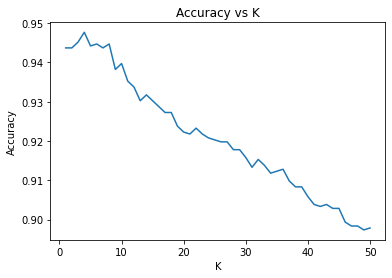

In [71]:
import matplotlib.pyplot as plt
plt.plot([row[0] for row in results], [row[1] for row in results])
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

## Best accuracy (best K)

In [72]:
print(max(results, key=lambda x:x[1]))

[4, 0.9476831091180867]


## Some plots of mistakes

In [75]:
# get the classification result for K == 4
test_res_k4 = KNN_optimised(all_distances, K=4)

# compare with the test sample labels and highlight the index of wrong classifications 
all_mistakes = []
for idx, (actual, test) in enumerate(zip(test_classes, test_res_k4)):
    if actual != test:
        # if the actual label and the test result doesn't match, append this index to the list
        all_mistakes.append(idx)


In [76]:
print(len(all_mistakes))

105


<Figure size 432x288 with 0 Axes>

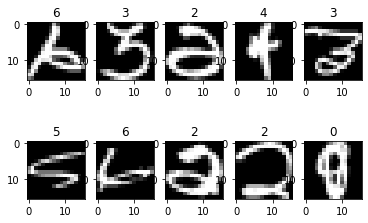

In [101]:
# plot the first 10 wrong classification
# create a matplotlib subplot
plt.figure()
fig, axs = plt.subplots(2, 5)
tricky_graphs = []
tricky_labels = []
# populate a list of tricky graphs and their labels
for idx in all_mistakes[:10]:
    img = test_data[idx][1:]
    tricky_graphs.append(img.reshape(16, 16))
    tricky_labels.append(test_data[idx][0])

# plot on each of the subplots, and update the plots' x-y coordianates
x = 0
for idx, img in enumerate(tricky_graphs):
    y = idx % 5
    if idx == 5:
        x += 1
    axs[x, y].imshow(img)
    axs[x, y].title.set_text(str(int(tricky_labels[idx])))

plt.show()

**Analysis Questions**

What values of k did you try?

- I tried different K's ranging from 1 to 50. 

Which value of k produced the highest accuracy? What general trends did you observe as k increased?

- Best K is 4, with accuracy of around 94.77 percent. General trend is as K increases, accuracy drops. 

When using the entire training dataset, what are your observations about the runtime of K-nearest neighbors? List 1-2 ideas for making this algorithm faster.

- It is painfully slow when using the entire dataset, as the calculation needed is roughly the number of training set multiplied by the number of test sets, then each of these calculation includes an euclidean calculation of 2 arrays of size 256... so about 7,000 * 2,000 * 256

- One idea to improve run time is to use Numpy matrix calculation, essentially turning the nested loop to one giant matrix calculation. Downside of this is it will require quite a lot of memory space, in essence, memory / run time trade-off. 

- For calculating euclidean distance, we can change it from a simple for-loop to numpy matrix calculation, take all differences between each pair, raise it to the power of 2, sum it, then take sqrt of the sum. (This is implemented in the optimised version of get_euc_distance())

- For going through different K values, we can change the KNN() function to first calculate the distance between each training record and testing record, once we have this giant m * n array, going through different K becomes a problem of taking the first K from each of this resulting distance list. (This is implemented in the optimised version of KNN())


